# Cafe Recommender System

Objectives: To recommend beverages (coffee or tea) to new customer based on customers' past orders in the cafe like ice cream and banana

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [89]:
df = pd.read_csv('https://raw.githubusercontent.com/abbylmm/DS_Uncut/main/cafe_customer_preferences.csv')
df.sample(10)

,name,ice cream,banana,coffee,tea
16,Asyraf,7,8,3,8
4,John Tan,7,3,8,7
18,Timothy,4,7,9,2
8,Zahiruddin,10,9,7,7
15,Tan Yong Le,7,7,7,7
25,Hiew,8,8,7,7
13,Dave,10,7,1,10
9,Chua,7,7,1,6
3,jaden,10,8,5,7
31,Farhanahani,10,5,1,5


In [90]:
# assume a new customer - David
# assign values based on own preference

new_cus = {'name': 'David', 
           'ice cream': 1, 
           'banana': 1
          }

df2 = df.append(new_cus, ignore_index=True)
df2.tail()

,name,ice cream,banana,coffee,tea
36,Marcus,8,5,9.0,3.0
37,dyana,8,6,6.0,4.0
38,Bee,10,7,4.0,3.0
39,SY,7,5,9.0,9.0
40,David,1,1,NaN,NaN


In [91]:
features = ['ice cream', 'banana']
cosims = cosine_similarity(df2[features])
print(cosims)

[[1.         0.87294348 0.99810023 ... 0.99995465 1.         0.98639392]
 [0.87294348 1.         0.90134031 ... 0.8775496  0.87294348 0.78086881]
 [0.99810023 0.90134031 1.         ... 0.99864171 0.99810023 0.9743912 ]
 ...
 [0.99995465 0.8775496  0.99864171 ... 1.         0.99995465 0.98478356]
 [1.         0.87294348 0.99810023 ... 0.99995465 1.         0.98639392]
 [0.98639392 0.78086881 0.9743912  ... 0.98478356 0.98639392 1.        ]]


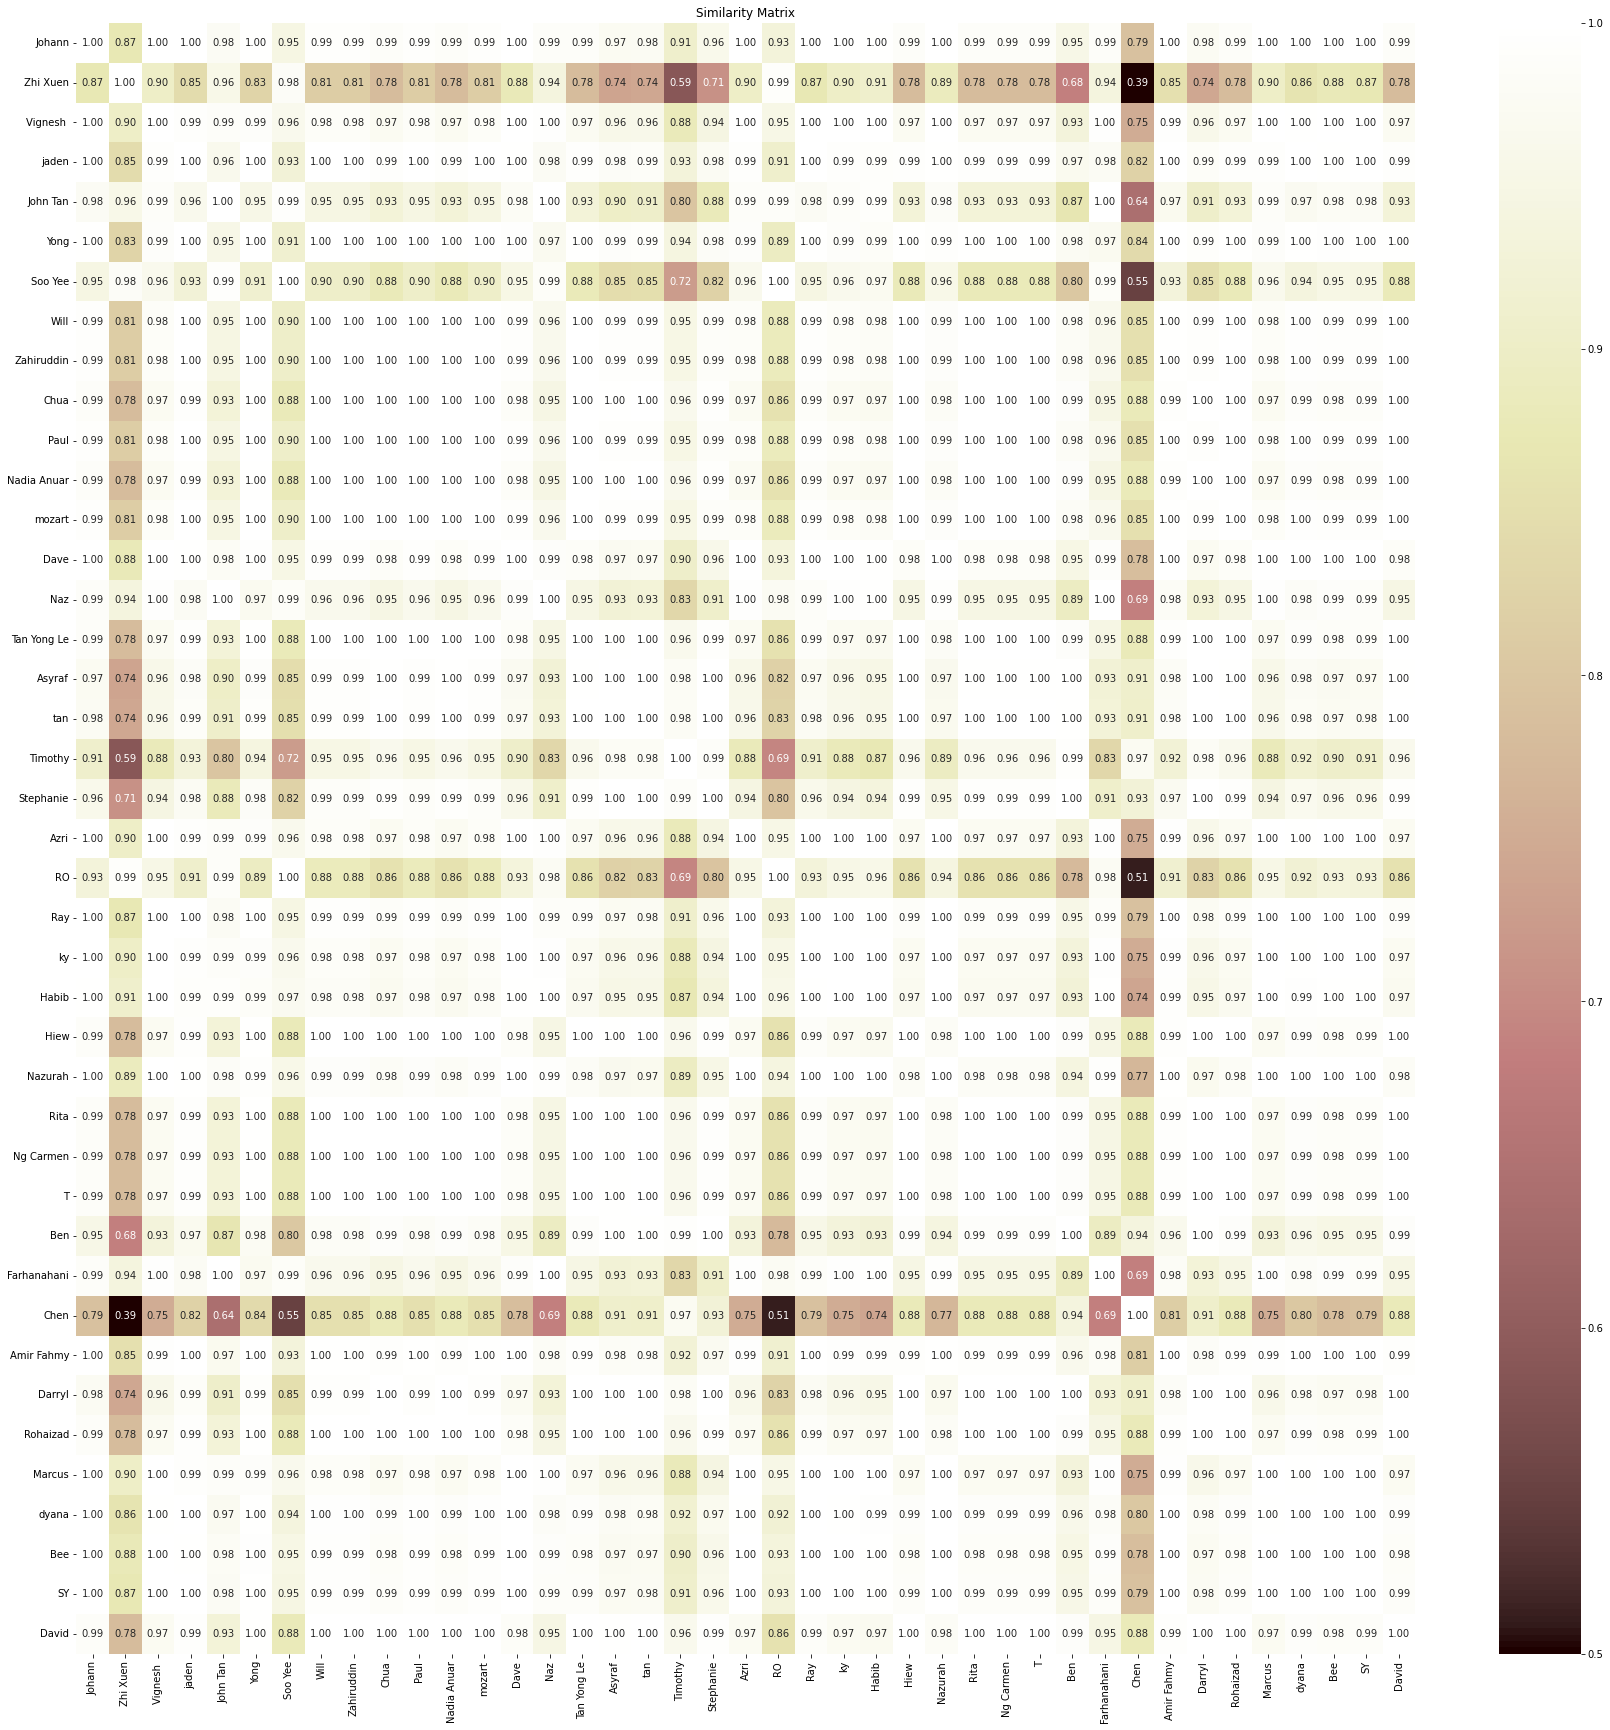

In [92]:
plt.figure(figsize=(30,30))
sns.heatmap(cosims, cmap='pink', vmax=1, vmin=0.5, annot=True, 
            xticklabels=df2['name'], yticklabels=df2['name'], fmt='.2f')
plt.title('Similarity Matrix')
plt.show()

In [93]:
# get David's cosims

new_cosims = cosims[-1]
print(new_cosims)

[0.98639392 0.78086881 0.9743912  0.99388373 0.92847669 0.99705449
 0.8804711  0.99861783 0.99861783 1.         0.99861783 1.
 0.99861783 0.98478356 0.9486833  1.         0.99778516 0.99827437
 0.96476382 0.99388373 0.9743912  0.85749293 0.98639392 0.9743912
 0.9701425  1.         0.98058068 1.         1.         1.
 0.98994949 0.9486833  0.8804711  0.99227788 0.99827437 1.
 0.9743912  0.98994949 0.98478356 0.98639392 1.        ]


In [94]:
# top most similar users

df_new_cosims = pd.DataFrame(new_cosims)
df2['Similarity Matrix'] = df_new_cosims
df2.sort_values('Similarity Matrix', ascending=False, inplace=True)
df2[:10]

,name,ice cream,banana,coffee,tea,Similarity Matrix
27,Rita,7,7,4.0,8.0,1.000000
9,Chua,7,7,1.0,6.0,1.000000
28,Ng Carmen,9,9,5.0,8.0,1.000000
29,T,7,7,6.0,5.0,1.000000
15,Tan Yong Le,7,7,7.0,7.0,1.000000
25,Hiew,8,8,7.0,7.0,1.000000
40,David,1,1,NaN,NaN,1.000000
35,Rohaizad,10,10,10.0,8.0,1.000000
11,Nadia Anuar,8,8,10.0,5.0,1.000000
7,Will,10,9,6.0,7.0,0.998618


In [95]:
# average weighted rating

df_avg_rating = pd.DataFrame(columns=['coffee', 'tea'], index=range(len(df))) 

# past orders multiply by David's cosims

for i in range(len(df)):
  df_avg_rating.loc[i].coffee = df['coffee'].loc[i] * new_cosims[i]
  df_avg_rating.loc[i].tea = df['tea'].loc[i] * new_cosims[i]

df_avg_rating

,coffee,tea
0,3.945576,1.972788
1,0.780869,3.904344
2,3.897565,7.79513
3,4.969419,6.957186
4,7.427814,6.499337
5,1.994109,7.976436
6,0.880471,3.521884
7,5.991707,6.990325
8,6.990325,6.990325
9,1.0,6.0


In [96]:
# recommend beverages

print('Coffee:', round(df_avg_rating['coffee'].mean(), 4))
print('Tea:', round(df_avg_rating['tea'].mean(), 4))

Coffee: 5.7382
Tea: 6.1607


* Tea has higher average weighted rating than coffee
* Based on customers' past orders, if new customer David ordered 1 ice cream and 1 banana, we would recommend Tea for him


In [97]:
df_more_coffee = df[df['coffee'] > df['tea']]
df_more_coffee

,name,ice cream,banana,coffee,tea
0,Johann,7,5,4,2
4,John Tan,7,3,8,7
10,Paul,10,9,10,4
11,Nadia Anuar,8,8,10,5
12,mozart,10,9,7,2
18,Timothy,4,7,9,2
19,Stephanie,8,10,10,8
21,RO,8,2,9,7
24,Habib,10,6,8,3
26,Nazurah,9,6,7,6


In [98]:
len(df_more_coffee)/len(df)

0.4

In [99]:
print('Ice Cream:', round(df_more_coffee['ice cream'].mean(), 4))
print('Banana:', round(df_more_coffee['banana'].mean(), 4))

Ice Cream: 8.125
Banana: 6.75
